<a href="https://colab.research.google.com/github/nandikasuresh/HateSpeechDetection/blob/main/InclusivEye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install praw requests

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Hate Speech detected", 2: "No Hate Speech Detected"})
print(df.head())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                   labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate Speech Detected  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Hate Speech detected  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Hate Speech detected  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Hate Speech detected  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Hate Speech detected  


In [ ]:
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Speech Detected
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Hate Speech detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Hate Speech detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Hate Speech detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Hate Speech detected


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('httpa?://\S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df['tweet'] = df['tweet'].apply(clean)
print(df.head())

                                               tweet                   labels
0   rt mayasolovely woman shouldnt complain clean...  No Hate Speech Detected
1   rt  boy dats coldtyga dwn bad cuffin dat hoe ...     Hate Speech detected
2   rt urkindofbrand dawg rt  ever fuck bitch sta...     Hate Speech detected
3           rt cganderson vivabased look like tranny     Hate Speech detected
4   rt shenikaroberts shit hear might true might ...     Hate Speech detected


In [ ]:
#df['labels'] = df['labels'].astype(str)

x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
y_test_copy = y_test

y_train = y_train.astype(str)
y_test = y_test.astype(str)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
clf_acc = accuracy_score(clf_predict, y_test)
print("Test accuarcy: {:.2f}%".format(clf_acc*100))

Test accuarcy: 86.80%


In [ ]:
accuracy = accuracy_score(y_test, clf_predict)
precision = precision_score(y_test, clf_predict, average='macro')
recall = recall_score(y_test, clf_predict, average='macro')
f1 = f1_score(y_test, clf_predict, average='macro')

#print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.68
Recall: 0.67
F1 Score: 0.68


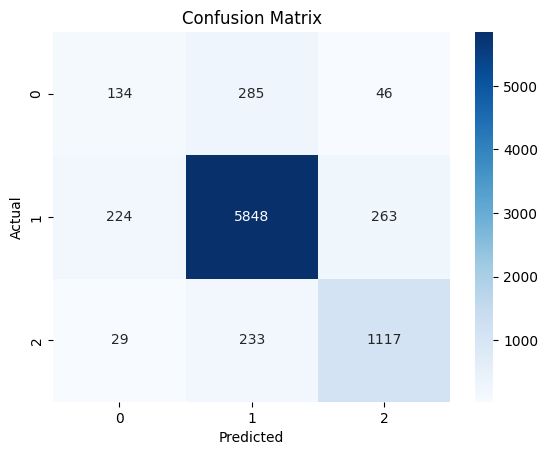

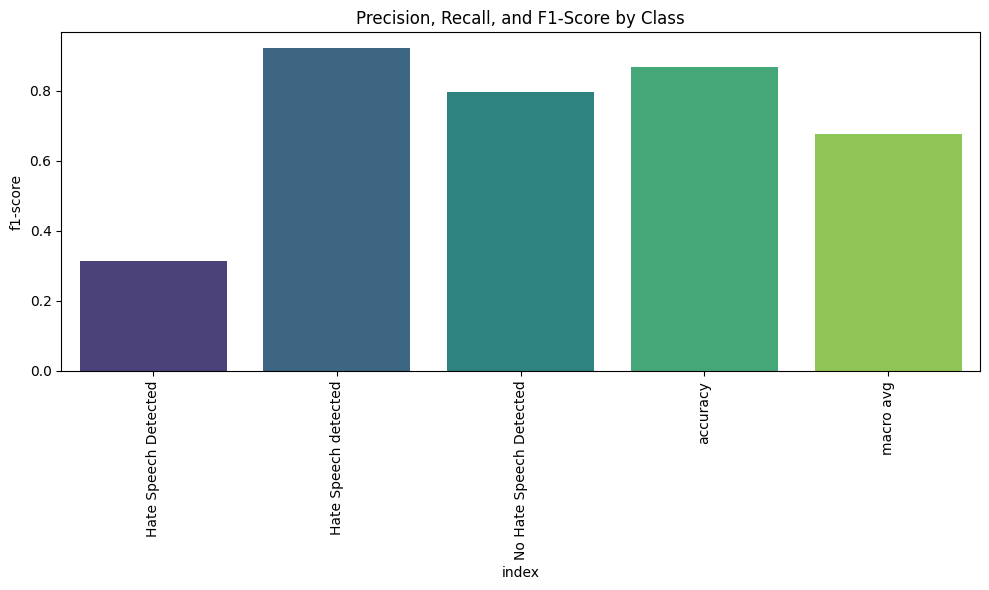

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, clf_predict)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

target_names = ["Hate Speech Detected", "Hate Speech detected", "No Hate Speech Detected"]

report = classification_report(y_test, clf_predict, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).T

plt.figure(figsize=(10, 6))
sns.barplot(data=report_df.iloc[:-1, :].reset_index(), x='index', y='f1-score', palette='viridis')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
test_data = "damn you"
df = cv.transform([test_data]).toarray()
if clf.predict(df) == 1:
    print("Hate Speech")
else:
    print("Not Hate Speech")

Hate Speech


In [ ]:
client_id = 'Vl0KkcDxvMpko8s05JaO2g'
client_secret = 'b5_sLVhSiuoY_79wqZ6PVVW2JODpZg'
user_agent = 'ReddScrape/1.0 by Awkward_Estate_1389'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

In [ ]:
subreddit_name = 'Swearing'
num_posts = 50

subreddit = reddit.subreddit(subreddit_name)

live_data = []

for submission in subreddit.new(limit=num_posts):
    print("------------------------------------------")
    print("Title:",submission.title)
    print("------------------------------------------")
    print(submission.selftext)
    print()
    post_data = {
        'title': submission.title,
        'body': submission.selftext
    }
    live_data.append(post_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



------------------------------------------
Title: Fuck my college life
------------------------------------------
College is going fucking great. Soo much fucking work with bitch professors and I’m paying soo much fucking money for tuition. Fucking horny as always and shit I have work due tonight lol

------------------------------------------
Title: Great Ducking Coloring Book with 100 designs
------------------------------------------
Hi everybody!

I recently created a whole book of 100 designs with mostly swear words. I enjoyed the process thoroughly and it would mean a world to me if maybe one of you would also enjoy it!

[https://antonscornerstudio.etsy.com/listing/1571720013](https://antonscornerstudio.etsy.com/listing/1571720013) 

[one of the designs](https://preview.redd.it/h9cpygtk1npb1.jpg?width=4419&format=pjpg&auto=webp&s=598e6954708cec5a6675738c1f88b9fd2222cade)

------------------------------------------
Title: Fhuck
------------------------------------------
Shyit

---

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def preprocess_text(data_dict):
    title = data_dict.get('title', '')
    title = title.lower()
    title = re.sub(r'http\S+|www.\S+', '', title)
    title = re.sub(f"[{re.escape(string.punctuation)}]", '', title)
    words = title.split()
    words = [word for word in words if word not in stopwords]
    data_dict['title'] = ' '.join(words)

    body = data_dict.get('body', '')
    body = body.lower()
    body = re.sub(r'http\S+|www.\S+', '', body)
    body = re.sub(f"[{re.escape(string.punctuation)}]", '', body)
    words = body.split()
    words = [word for word in words if word not in stopwords]
    data_dict['body'] = ' '.join(words)

    return data_dict

In [ ]:
preprocessed_live_data = [preprocess_text(data_dict) for data_dict in live_data]

live_data_text = [' '.join([data['title'], data['body']]) for data in preprocessed_live_data]

X_live_data = cv.transform(live_data_text)

live_data_predictions = clf.predict(X_live_data)

for i, prediction in enumerate(live_data_predictions):
    data = live_data[i]
    title = data['title']
    body = data['body']
    predicted_label = prediction

    print(f"Title: {title}")
    print(f"Body: {body}")
    print(f"Predicted Label: {'Hate Speech' if predicted_label == 1 else 'Non-Hate Speech'}")
    print("------------------------------")


Title: fuck college life
Body: college going fucking great soo much fucking work bitch professors i’m paying soo much fucking money tuition fucking horny always shit work due tonight lol
Predicted Label: Hate Speech
------------------------------
Title: great ducking coloring book 100 designs
Body: hi everybody recently created whole book 100 designs mostly swear words enjoyed process thoroughly would mean world maybe one would also enjoy one designs
Predicted Label: Non-Hate Speech
------------------------------
Title: fhuck
Body: shyit
Predicted Label: Non-Hate Speech
------------------------------
Title: cunts
Body: subreddit dicking swearing fuckin head like shit
Predicted Label: Hate Speech
------------------------------
Title: lets see profanitycounter
Body: 
Predicted Label: Non-Hate Speech
------------------------------
Title: soothing rant seo spammers
Body: fucking fuck fuck fucking seem whenever fuck fucking search fuck outta fucking google every fucking thing fucking seo sp